In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df=pd.read_csv("/content/sample_data/hotel_bookings.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [30]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [31]:
df.fillna(0,inplace=True)

In [32]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [33]:
df1=df[df['adults']+df['children']+df['babies']!=0]
clean_data=df1
df.size-df1.size

5760

# WHere do the guest come from?(Spatial Analysis)

In [34]:
country_wise_data=clean_data[clean_data['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns=['Country','No. of guests']
country_wise_data

,Country,No. of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [35]:
import plotly.express as ps

In [36]:
map_guest=ps.choropleth(country_wise_data,locations=country_wise_data['Country'],color=country_wise_data['No. of guests'],
                        hover_name=country_wise_data['Country'],title="Home Country of Our Guest")
map_guest.show()  # hover_name represent what to see when move pointer to map

#How much do guests pay for a room per night?

In [37]:
clean_data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [38]:
data=clean_data[clean_data['is_canceled']!=0]


(0.0, 500.0)

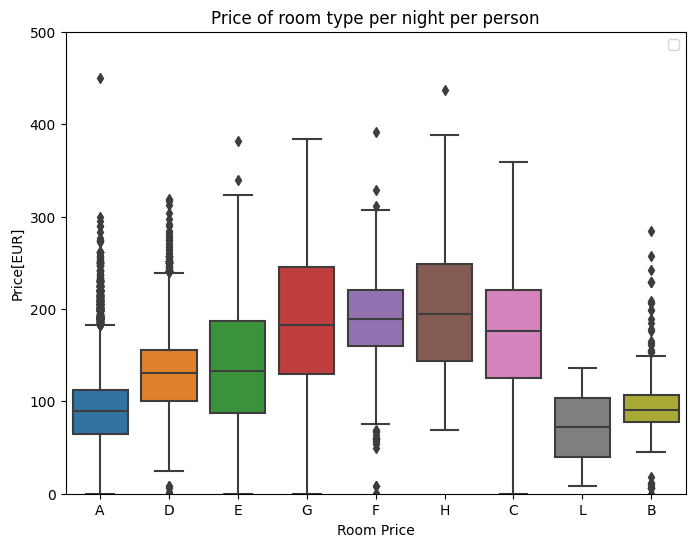

In [39]:
plt.figure(figsize=(8,6))
sns.boxplot(x='reserved_room_type',y='adr',data=data) #adr -> average daily rate money
plt.title("Price of room type per night per person")
plt.xlabel("Room Price")
plt.ylabel('Price[EUR]')
plt.legend(loc='upper right')
plt.ylim(0,500)

#How does the price per night(adr) vary over the year?

In [40]:
data_resort=clean_data[(clean_data['hotel']=='Resort Hotel') & (clean_data['is_canceled']==0)]
data_city=clean_data[(clean_data['hotel']=='City Hotel') & (clean_data['is_canceled']==0)]


In [41]:
resort_hotel=data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [42]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()


In [43]:
final=resort_hotel.merge(city_hotel,on='arrival_date_month')

In [44]:
final.columns=["month","Price_for_resort_hotel","Price_for_city_hotel"]

In [45]:
final

,month,Price_for_resort_hotel,Price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


#Sort the month

In [46]:
test=final
from calendar import month_name

def sort_month(df,columns):
  month_dict={j:i for i,j in enumerate(month_name)}
  df['month_num']=df[columns].apply(lambda x:month_dict[x])
  return df.sort_values(by="month_num")

In [64]:
final=sort_month(test,"month").reset_index().drop(['index','month_num'],axis=1)
final

,month,Price_for_resort_hotel,Price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


<Axes: xlabel='month'>

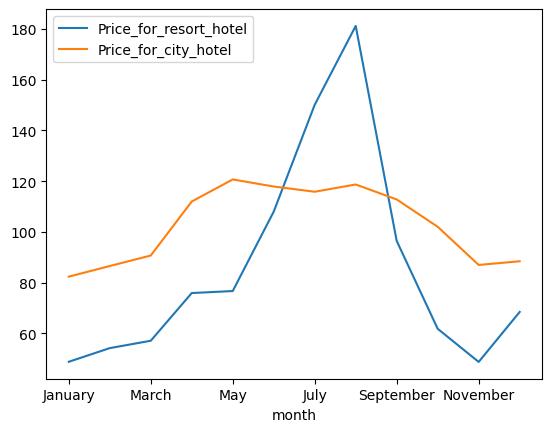

In [65]:
final.plot(kind="line",x="month",y=['Price_for_resort_hotel','Price_for_city_hotel'])

#Which are the most busy month or in which month guests are high?

In [66]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no. of guests_resort']
print(rush_resort)


        month  no. of guests_resort
0      August                  3257
1        July                  3137
2     October                  2575
3       March                  2571
4       April                  2550
5         May                  2535
6    February                  2308
7   September                  2102
8        June                  2037
9    December                  2014
10   November                  1975
11    January                  1866


In [67]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no. of guests_city']
print(rush_city)

        month  no. of guests_city
0      August                5367
1        July                4770
2         May                4568
3        June                4358
4     October                4326
5   September                4283
6       March                4049
7       April                4010
8    February                3051
9    November                2676
10   December                2377
11    January                2249


In [68]:
final_rush=rush_resort.merge(rush_city,on='month')
final_rush.columns=['month','no of guests in resort','no of guest in city']
final_rush

,month,no of guests in resort,no of guest in city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [69]:
final_rush=sort_month(final_rush,'month').reset_index().drop(['index','month_num'],axis=1)
final_rush

,month,no of guests in resort,no of guest in city
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


<Axes: xlabel='month'>

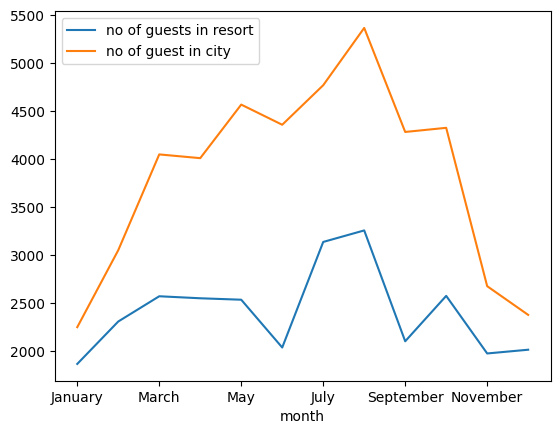

In [70]:
final_rush.plot(kind='line',x="month",y=['no of guests in resort','no of guest in city'])